In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd

df = pd.read_csv('NFLX_2.csv')
df = df[['Close']]
print(df)

          Close
0    313.480011
1    317.500000
2    316.480011
3    306.700012
4    300.940002
..          ...
975  427.140015
976  457.130005
977  429.480011
978  405.600006
979  410.170013

[980 rows x 1 columns]


In [3]:


def window_df(df, n):
    windowed_df = pd.DataFrame()
    for i in range(n, 0, -1):
        windowed_df[f'Target-{i}'] = df['Close'].shift(i)
    windowed_df['Target'] = df['Close']
    return windowed_df.dropna()

window = 100
df_window = window_df(df, window)

C:\Users\mikol\AppData\Local\Temp\ipykernel_18652\3188007683.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  windowed_df['Target'] = df['Close']


In [4]:

# load the dataset

dataset = df.values
dataset = dataset.astype('float32')

In [5]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

784 196


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:

# reshape into X=t and Y=t+1
look_back = window
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(1, look_back)))
# model.add(LSTM(200))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=16, verbose=2)

Epoch 1/50
43/43 - 1s - loss: 0.0532 - 1s/epoch - 31ms/step
Epoch 2/50
43/43 - 0s - loss: 0.0400 - 93ms/epoch - 2ms/step
Epoch 3/50
43/43 - 0s - loss: 0.0394 - 91ms/epoch - 2ms/step
Epoch 4/50
43/43 - 0s - loss: 0.0391 - 93ms/epoch - 2ms/step
Epoch 5/50
43/43 - 0s - loss: 0.0401 - 91ms/epoch - 2ms/step
Epoch 6/50
43/43 - 0s - loss: 0.0398 - 92ms/epoch - 2ms/step
Epoch 7/50
43/43 - 0s - loss: 0.0384 - 93ms/epoch - 2ms/step
Epoch 8/50
43/43 - 0s - loss: 0.0386 - 100ms/epoch - 2ms/step
Epoch 9/50
43/43 - 0s - loss: 0.0391 - 94ms/epoch - 2ms/step
Epoch 10/50
43/43 - 0s - loss: 0.0386 - 93ms/epoch - 2ms/step
Epoch 11/50
43/43 - 0s - loss: 0.0397 - 89ms/epoch - 2ms/step
Epoch 12/50
43/43 - 0s - loss: 0.0413 - 87ms/epoch - 2ms/step
Epoch 13/50
43/43 - 0s - loss: 0.0383 - 84ms/epoch - 2ms/step
Epoch 14/50
43/43 - 0s - loss: 0.0384 - 90ms/epoch - 2ms/step
Epoch 15/50
43/43 - 0s - loss: 0.0404 - 91ms/epoch - 2ms/step
Epoch 16/50
43/43 - 0s - loss: 0.0384 - 84ms/epoch - 2ms/step
Epoch 17/50
43/43

KeyboardInterrupt: 

3/3 [==============================] - 0s 2ms/step
[[[0.36991033]]

 [[0.36963567]]

 [[0.36975485]]

 [[0.37024125]]

 [[0.3699259 ]]

 [[0.36971575]]

 [[0.3699344 ]]

 [[0.369897  ]]

 [[0.36975127]]

 [[0.37012762]]

 [[0.37086093]]

 [[0.37100303]]

 [[0.37093437]]

 [[0.3712805 ]]

 [[0.3717878 ]]

 [[0.3717505 ]]

 [[0.37124282]]

 [[0.37133467]]

 [[0.37178457]]

 [[0.37176794]]

 [[0.37165427]]

 [[0.3721174 ]]

 [[0.37187672]]

 [[0.37209344]]

 [[0.37188458]]

 [[0.3725905 ]]

 [[0.37329185]]

 [[0.37291697]]

 [[0.3721731 ]]

 [[0.3723367 ]]

 [[0.3727517 ]]

 [[0.37268937]]

 [[0.3726399 ]]

 [[0.37267643]]

 [[0.37233645]]

 [[0.37298864]]

 [[0.3729149 ]]

 [[0.37254506]]

 [[0.37216178]]

 [[0.37280878]]

 [[0.37308756]]

 [[0.3732825 ]]

 [[0.3732485 ]]

 [[0.3734383 ]]

 [[0.37355697]]

 [[0.37326872]]

 [[0.37312084]]

 [[0.3741686 ]]

 [[0.37407583]]

 [[0.37327254]]

 [[0.373658  ]]

 [[0.3746616 ]]

 [[0.3741345 ]]

 [[0.3731753 ]]

 [[0.37310362]]

 [[0.37435627]

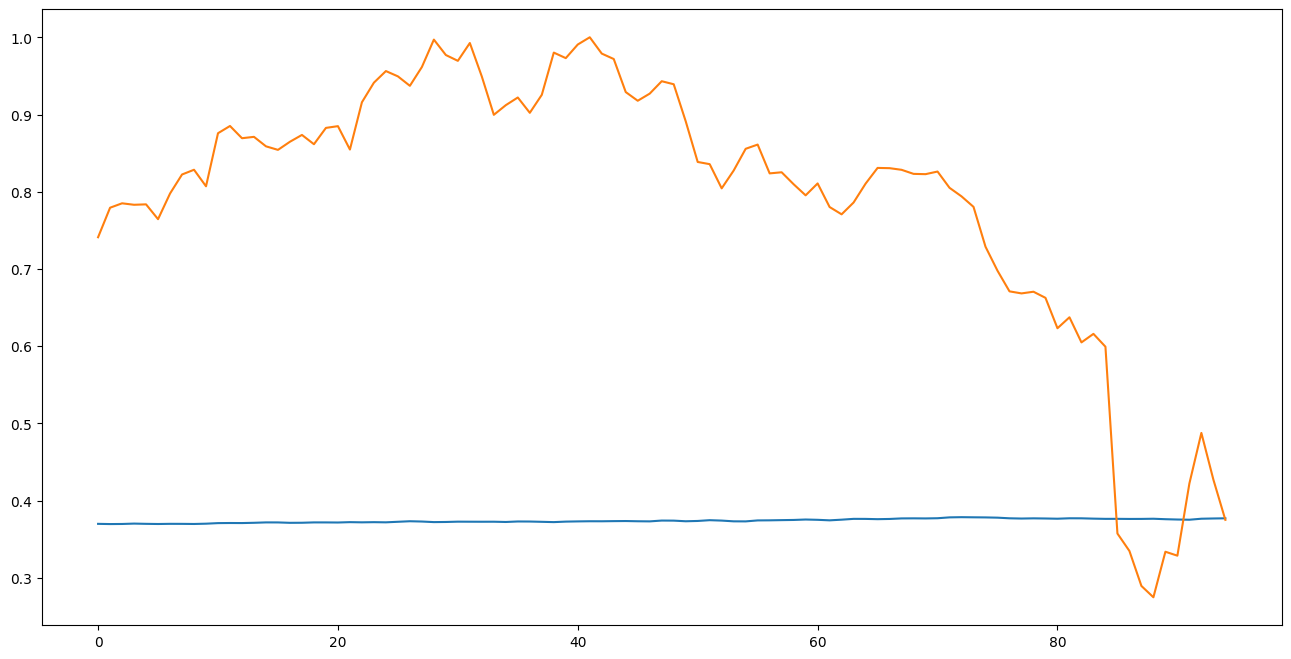

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

predicted = model.predict(testX)
print(predicted)
print(testX[0])

plt.figure(figsize=(16,8))
plt.plot(predicted.reshape(-1))
plt.plot(testY)

# rms =  math.sqrt(mean_squared_error(real_prices,predicted_prices))
# print(rms)

In [ ]:
testX.shape
predictions = []
latest_prices = trainX

x,y,z = latest_prices.shape
for i in range(testX.shape[0]):
    
    prediction = model.predict(latest_prices)[-1]
    predictions.append(prediction)
    print(prediction)
    temp_array = latest_prices[1:,:,:]
    last_row = temp_array[-1,:,:]
    temp_row = np.zeros(last_row.shape)
    

    
    for i in range(z-1):
        temp_row[0][i] = last_row[0][i+1]
    
    temp_row[0][-1] = prediction
    # print(temp_row)
    # temp_row_reshaped = temp_row.reshape(1, temp_row.shape[0], 1)
    latest_prices = np.concatenate([latest_prices, temp_row[np.newaxis, :, :]], axis=0)
    # print(temp_row[0,-3:])

    

22/22 [==============================] - 0s 1ms/step
[[0.3697639]]
22/22 [==============================] - 0s 1ms/step
[[0.36912927]]
22/22 [==============================] - 0s 1ms/step
[[0.36730152]]
22/22 [==============================] - 0s 1ms/step
[[0.3672344]]
22/22 [==============================] - 0s 973us/step
[[0.36650264]]
22/22 [==============================] - 0s 980us/step
[[0.3664718]]
22/22 [==============================] - 0s 911us/step
[[0.3668912]]
22/22 [==============================] - 0s 956us/step
[[0.36782938]]
22/22 [==============================] - 0s 1ms/step
[[0.36646354]]
22/22 [==============================] - 0s 1ms/step
[[0.3657006]]
22/22 [==============================] - 0s 980us/step
[[0.36741412]]
22/22 [==============================] - 0s 984us/step
[[0.36796734]]
22/22 [==============================] - 0s 965us/step
[[0.36773503]]
22/22 [==============================] - 0s 985us/step
[[0.36650023]]
22/22 [==============================

In [ ]:
print((((np.array(predictions)).reshape(-1))).reshape(-1, 1))
predicted_prices = scaler.inverse_transform((((np.array(predictions)).reshape(-1))).reshape(-1, 1))
real_prices = scaler.inverse_transform(testY.reshape(-1, 1))

[[0.3697639 ]
 [0.36912927]
 [0.36730152]
 [0.3672344 ]
 [0.36650264]
 [0.3664718 ]
 [0.3668912 ]
 [0.36782938]
 [0.36646354]
 [0.3657006 ]
 [0.36741412]
 [0.36796734]
 [0.36773503]
 [0.36650023]
 [0.3679567 ]
 [0.3688567 ]
 [0.3690729 ]
 [0.36945832]
 [0.37115616]
 [0.37032694]
 [0.36960223]
 [0.3698007 ]
 [0.37024972]
 [0.36973608]
 [0.36846647]
 [0.36814433]
 [0.3676364 ]
 [0.3676088 ]
 [0.3669845 ]
 [0.36691663]
 [0.36773947]
 [0.368929  ]
 [0.36895463]
 [0.36894697]
 [0.3696735 ]
 [0.36770096]
 [0.3665964 ]
 [0.36698338]
 [0.36771396]
 [0.36768645]
 [0.36723256]
 [0.367833  ]
 [0.3683135 ]
 [0.3672568 ]
 [0.36784482]
 [0.3674772 ]
 [0.36722642]
 [0.36672604]
 [0.3674572 ]
 [0.36679858]
 [0.3651274 ]
 [0.36563164]
 [0.36637568]
 [0.3671744 ]
 [0.3661824 ]
 [0.36701846]
 [0.36773366]
 [0.36644903]
 [0.36623046]
 [0.36592358]
 [0.3666249 ]
 [0.36505806]
 [0.36341172]
 [0.36370978]
 [0.3645776 ]
 [0.36315924]
 [0.363475  ]
 [0.36365315]
 [0.36353993]
 [0.3630669 ]
 [0.3626296 ]
 [0.36

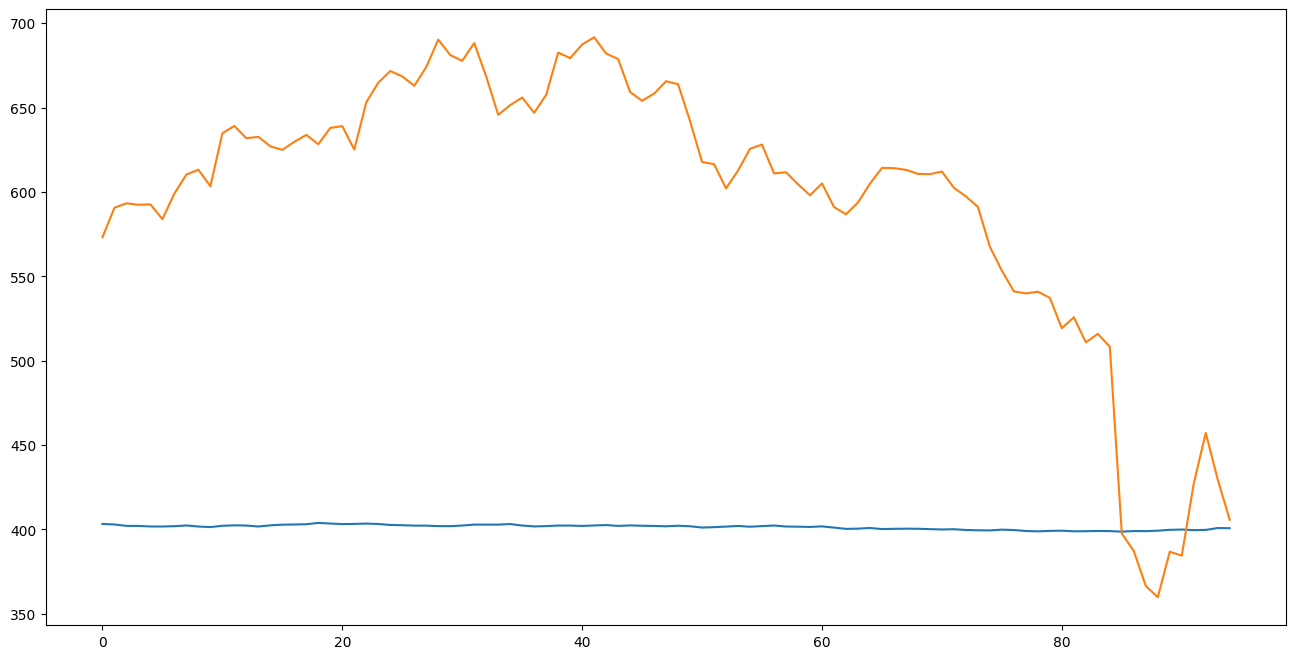

In [ ]:


plt.figure(figsize=(16,8))
plt.plot(predicted_prices)
plt.plot(real_prices)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(95,)


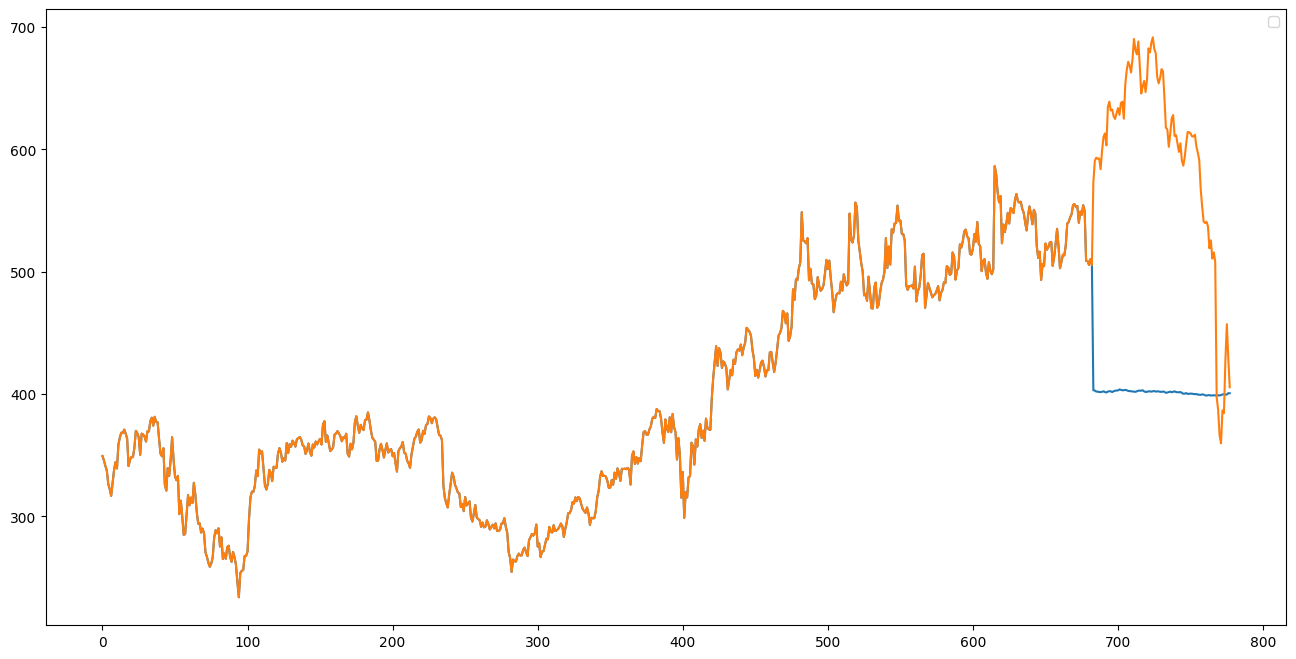

In [ ]:
print(predicted_prices.reshape(-1).shape)
plt.figure(figsize = (16,8))

previous_prices = scaler.inverse_transform(trainY.reshape(-1, 1))

plt.plot(np.vstack((previous_prices,predicted_prices)))
plt.plot(np.vstack((previous_prices,real_prices)))
# title = "epochs:"+ str(epochs)+"   Batch size:"+str(batch_size)+"    Time step:"+str(time_step)
# plt.title(title)
plt.legend()
plt.show()